# Making The Class Functionalities

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# I wanted to implement the whole model in a class instead of seperate functions
class Regressor:

  w = np.array([])  # N Weights Vector: w1, w2, w3, w4,....,wn
  x = np.array([])  # MxN Features Matrix (each column represents a feature and each row holds a different values for each feature)
  b = 0 # Y-Intercept (Scalar)
  y = np.array([])  # M Training labels vector (correct output)


  # Constructor for the Regressor
  def __init__(self, X = np.array([]), Y = np.array([]), w_user = np.array([]), b_user = 0, alpha = 0.0000001, iterations = 1000):
    self.x = X

    if(w_user.shape[0] == 0):
      self.w = np.zeros(self.x.shape[1])
    else:
      self.w = w_user

    self.b = b_user
    self.y = Y
    self.a = alpha
    self.iters = iterations

    self.j_history = [] # To store history of the costs while training
    self.w_history = [] # To store history of the weights while training
    self.b_history = [] # To store history of the b while training


  def cost(self, w, x, b, y):
    m = x.shape[0]

    sum = 0.0


    # Cost function = (1/2m) * (Summation from i = 0 to m ->> [(W.X[i] + b) - Y[i]]^2)
    for i in range(m):
      sum += (((np.dot(w, x[i]) + b) - y[i]) ** 2) / (2*m)

    j = sum
    return j



  def derivatives(self, w, x, b, y):
    m = x.shape[0]

    dw = np.zeros(w.shape)
    db = 0.0


    # Derivative of W =  (1/m) * (Summation from i = 0 to m ->> [(W.X[i] + b) - Y[i]] * X[i])
    # Derivative of b = (1/m) * (Summation from i = 0 to m ->> [(W.X[i] + b) - Y[i]])
    for i in range(m):
      dw += (np.dot(((np.dot(w, x[i]) + b) - y[i]), x[i]) / m)
      db += (((np.dot(w, x[i]) + b) - y[i]) / m)


    return dw, db



  def gradient_descent(self):

    # For the number of iterations, get the derivatives (1) and update the weights and intercepts (2), and calculate the cost (3).
    # Then append the cost, weights and b into their history list (4).
    # And each 50th iteration print the current iteration number and the current cost or loss value (5).
    for i in range(self.iters):
      dw, db = self.derivatives(self.w, self.x, self.b, self.y)
      self.w = self.w - self.a * dw
      self.b = self.b - self.a * db

      j = self.cost(self.w, self.x, self.b, self.y)

      self.j_history.append(j)
      self.w_history.append(self.w.copy())  # append a copy of the entire weight vector
      self.b_history.append(self.b)

      if i % 50 == 0:
        print(f"Iteration: {i} \nLoss: {j}")


  # I did this plot function with chatGPT's help :)
  def plot_history(self):
    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(self.j_history, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Weights', color=color)
    for i in range(len(self.w)):
      ax2.plot([w[i] for w in self.w_history], label=f'w{i}', linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.legend()
    plt.show()




# Loading the dataset

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Fetch the California Housing dataset
california_housing = fetch_california_housing()

# Create a DataFrame from the dataset
cali = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Add the target variable to the DataFrame
cali['MedHouseVal'] = california_housing.target

cali.head(6)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697


In [6]:
cali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Model Testing

In [7]:
x_train, x_test, y_train, y_test = train_test_split(cali[cali.columns[:-1]], cali['MedHouseVal'], train_size = 0.3)
x_train.shape

(6192, 8)

In [8]:
y_train.shape

(6192,)

In [9]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [10]:
x_train.shape

(6192, 8)

In [11]:
x_train[1]

array([ 5.63830000e+00,  2.70000000e+01,  6.45841785e+00,  1.05476673e+00,
        1.12100000e+03,  2.27383367e+00,  3.65000000e+01, -1.21730000e+02])

In [12]:
model = Regressor(x_train, y_train)

In [13]:
model.gradient_descent()

Iteration: 0 
Loss: 2.0974005961229403
Iteration: 50 
Loss: 1.4846672801039769
Iteration: 100 
Loss: 1.4323929243660605
Iteration: 150 
Loss: 1.3834310635363152
Iteration: 200 
Loss: 1.3375717253384376
Iteration: 250 
Loss: 1.2946182472280217
Iteration: 300 
Loss: 1.254386432714705
Iteration: 350 
Loss: 1.216703761163385
Iteration: 400 
Loss: 1.181408647684525
Iteration: 450 
Loss: 1.1483497499386384
Iteration: 500 
Loss: 1.11738531888106
Iteration: 550 
Loss: 1.0883825906617082
Iteration: 600 
Loss: 1.0612172170711858
Iteration: 650 
Loss: 1.0357727320897507
Iteration: 700 
Loss: 1.011940052250707
Iteration: 750 
Loss: 0.9896170086748137
Iteration: 800 
Loss: 0.9687079087680832
Iteration: 850 
Loss: 0.9491231257027132
Iteration: 900 
Loss: 0.9307787139200341
Iteration: 950 
Loss: 0.9135960490059487


In [14]:
model.j_history

[2.0974005961229403,
 1.7854265713151571,
 1.646925441834754,
 1.5850817975361569,
 1.5571134806666884,
 1.5441153078628433,
 1.5377331894076671,
 1.534275501411884,
 1.5321109360378564,
 1.5305186269167625,
 1.5291800263770015,
 1.5279543689992365,
 1.5267794502904444,
 1.5256277813673256,
 1.5244872139704528,
 1.5233523787727161,
 1.5222209020184572,
 1.521091733678739,
 1.5199644086730528,
 1.5188387204075304,
 1.5177145765134326,
 1.516591935098876,
 1.515470776578724,
 1.5143510912265656,
 1.5132328736738236,
 1.512116120479063,
 1.5110008290538357,
 1.5098869971880102,
 1.5087746228400465,
 1.5076637040442653,
 1.5065542388699473,
 1.5054462254031529,
 1.5043396617388238,
 1.5032345459771217,
 1.5021308762219796,
 1.5010286505803325,
 1.4999278671618386,
 1.4988285240787396,
 1.4977306194457871,
 1.4966341513802355,
 1.495539118001798,
 1.4944455174326632,
 1.4933533477974708,
 1.4922626072233331,
 1.4911732938397826,
 1.4900854057788355,
 1.4889989411749278,
 1.4879138981649367,

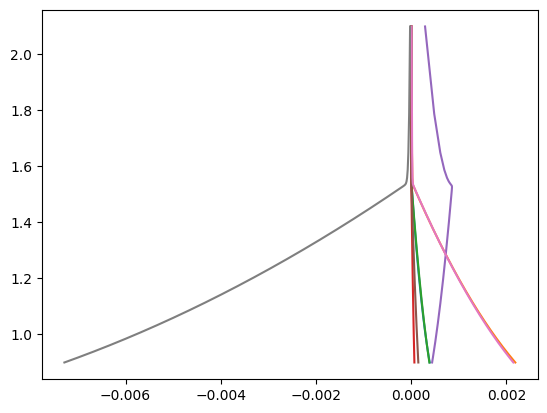

In [15]:
plt.plot(model.w_history, model.j_history)

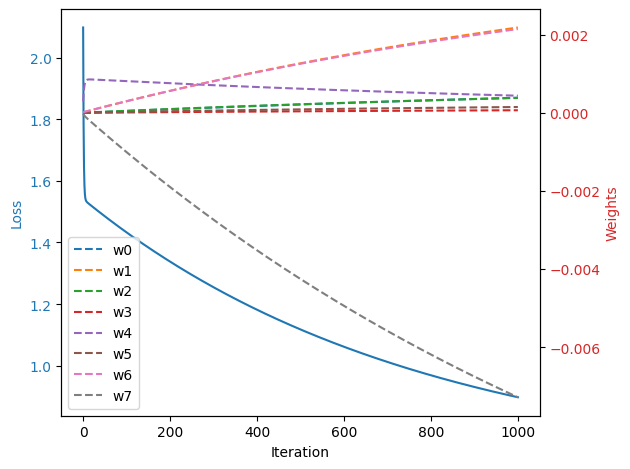

In [16]:
model.plot_history()

In [17]:
test = model.cost(model.w, x = x_test, b = model.b, y = y_test)
test

0.882268219437284

In [18]:
cali.head(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992


In [21]:
# lets try with different learning rates
model2 = Regressor(x_train, y_train, alpha = 0.00000015, iterations = 1500)

In [22]:
model2.gradient_descent()

Iteration: 0 
Loss: 1.8513676160739478
Iteration: 50 
Loss: 1.4575668094315988
Iteration: 100 
Loss: 1.3829339634449425
Iteration: 150 
Loss: 1.3152824014952142
Iteration: 200 
Loss: 1.2539588608733796
Iteration: 250 
Loss: 1.1983712069965256
Iteration: 300 
Loss: 1.1479827134305094
Iteration: 350 
Loss: 1.1023068771513622
Iteration: 400 
Loss: 1.0609027189611155
Iteration: 450 
Loss: 1.0233705236606836
Iteration: 500 
Loss: 0.9893479788298409
Iteration: 550 
Loss: 0.958506674915508
Iteration: 600 
Loss: 0.9305489328192027
Iteration: 650 
Loss: 0.9052049283384942
Iteration: 700 
Loss: 0.8822300856847974
Iteration: 750 
Loss: 0.8614027148989677
Iteration: 800 
Loss: 0.8425218703424211
Iteration: 850 
Loss: 0.8254054095768596
Iteration: 900 
Loss: 0.8098882338815856
Iteration: 950 
Loss: 0.7958206934118969
Iteration: 1000 
Loss: 0.7830671415925005
Iteration: 1050 
Loss: 0.7715046247815437
Iteration: 1100 
Loss: 0.7610216945474305
Iteration: 1150 
Loss: 0.751517331085132
Iteration: 1200 


In [23]:
cost2 = model2.cost(model2.w, x = x_test, b = model2.b, y = y_test)
cost2

0.699911127760683

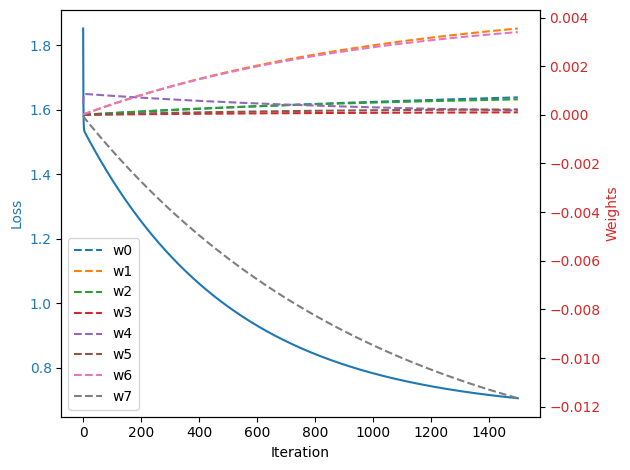

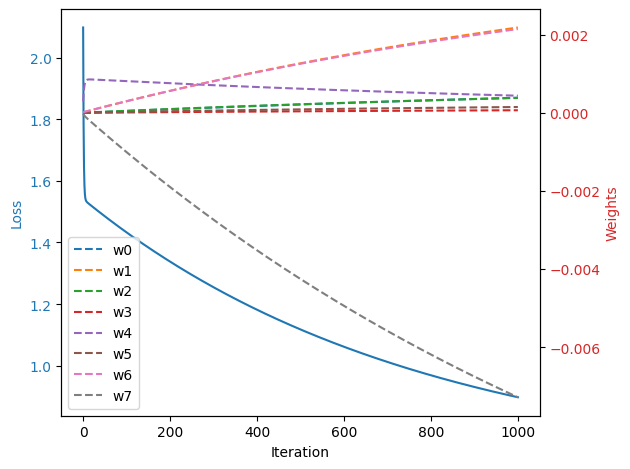

In [25]:
model2.plot_history()
model.plot_history()

In [26]:
model3 = Regressor(x_train, y_train, alpha = 0.0000002, iterations = 2000)
model3.gradient_descent()

Iteration: 0 
Loss: 1.6761589191803707
Iteration: 50 
Loss: 1.4313481946102722
Iteration: 100 
Loss: 1.3366261756455957
Iteration: 150 
Loss: 1.2535314523750003
Iteration: 200 
Loss: 1.1806362453262162
Iteration: 250 
Loss: 1.1166881001889064
Iteration: 300 
Loss: 1.060588358640185
Iteration: 350 
Loss: 1.0113732728600533
Iteration: 400 
Loss: 0.9681974391028813
Iteration: 450 
Loss: 0.9303192655550181
Iteration: 500 
Loss: 0.8970882246768492
Iteration: 550 
Loss: 0.8679336709022824
Iteration: 600 
Loss: 0.842355031476618
Iteration: 650 
Loss: 0.8199132018172441
Iteration: 700 
Loss: 0.800222997486931
Iteration: 750 
Loss: 0.782946533032338
Iteration: 800 
Loss: 0.7677874138726031
Iteration: 850 
Loss: 0.7544856413989426
Iteration: 900 
Loss: 0.742813143706156
Iteration: 950 
Loss: 0.7325698551309815
Iteration: 1000 
Loss: 0.7235802772062545
Iteration: 1050 
Loss: 0.7156904619151108
Iteration: 1100 
Loss: 0.7087653653885502
Iteration: 1150 
Loss: 0.7026865265575332
Iteration: 1200 
Los

In [27]:
cost3 = model3.cost(model3.w, x_test, model3.b, y_test)
cost3 # It appears that increasing learning rate and iterations did not affect the prediction accuracy as positivaly as the training phase

0.6623546160007922

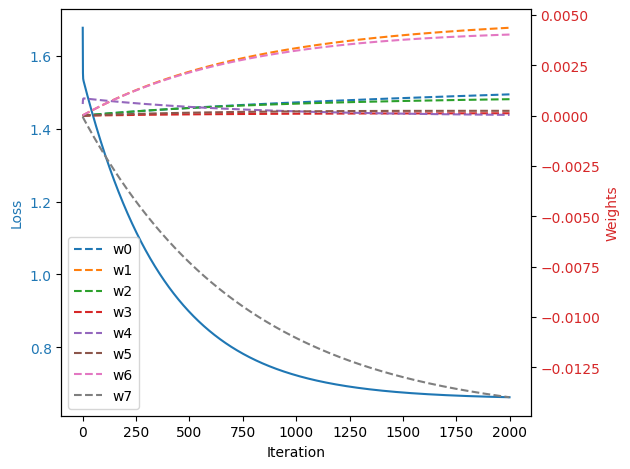

In [28]:
model3.plot_history() # I notice the curve getting more curvier than the last time, I think that means its converging earlier each time

In [29]:
# last try
model4 = Regressor(x_train, y_train, alpha = 0.0000005, iterations = 2000)
model4.gradient_descent()

Iteration: 0 
Loss: 2.112216684082672
Iteration: 50 
Loss: 1.2910253592388767
Iteration: 100 
Loss: 1.114599952248749
Iteration: 150 
Loss: 0.9874682843239677
Iteration: 200 
Loss: 0.8958509799535651
Iteration: 250 
Loss: 0.8298205044163319
Iteration: 300 
Loss: 0.7822244329672776
Iteration: 350 
Loss: 0.7479097057889366
Iteration: 400 
Loss: 0.7231637321438661
Iteration: 450 
Loss: 0.7053117264209481
Iteration: 500 
Loss: 0.6924266035294876
Iteration: 550 
Loss: 0.6831199691737929
Iteration: 600 
Loss: 0.6763915360140627
Iteration: 650 
Loss: 0.6715206335348473
Iteration: 700 
Loss: 0.6679880448854262
Iteration: 750 
Loss: 0.6654196931909667
Iteration: 800 
Loss: 0.6635460696056743
Iteration: 850 
Loss: 0.662173002713562
Iteration: 900 
Loss: 0.6611605989540961
Iteration: 950 
Loss: 0.6604080699714906
Iteration: 1000 
Loss: 0.659842801276502
Iteration: 1050 
Loss: 0.6594124766183146
Iteration: 1100 
Loss: 0.659079403883346
Iteration: 1150 
Loss: 0.6588164271135841
Iteration: 1200 
Los

In [30]:
# We notice that the model kind of converged at about the 1150 iteration
cost4 = model4.cost(model4.w, x_test, model4.b, y_test)
cost4 # it differed from model 3 by only 0.01

0.6576916171985967

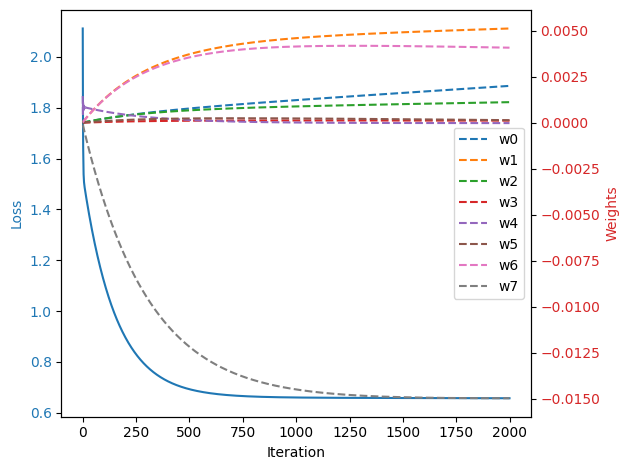

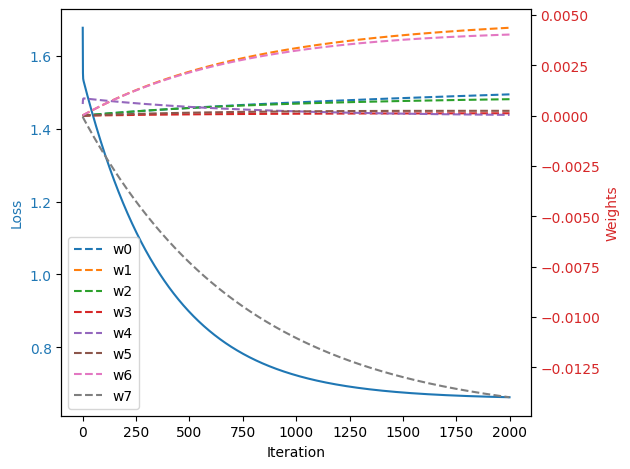

None None


In [31]:
print(model4.plot_history(), model3.plot_history()) # model  starting 4 converging earlier than all of them